

 <font size="5"> <div class="alert alert-block alert-info"> Introdução a Modelos Dinâmicos (IMD): Semana 6 (Aula P11) </div> </font> 

     
    
  <font size="5"> Licenciatura em Ciência de Dados </font>
  
  
  
  <font size="4"> **Diana Aldea Mendes**</font>
  
  
    
  <font size="3"> diana.mendes@iscte-iul.pt </font> 
  
  
  <font size="4"> ISCTE-IUL, 19 de março de 2024 </font>
   
   
 
    
 
   
  <font size="5"> <div class="alert alert-success" role="alert"> Modelos ARMA/SARIMAX - Exemplos - 1 </div></font> 

In [ ]:
library(car)  # para bases de dados e gráficos
library(lmtest)  # para testes de hipótese sobre os pressupostos dos resíduos
library(tseries)  # teste de Jarque-Bera
library(ggplot2)   # gráficos
library(tidyr)   # data-frames
library(MASS)   # estatística, bases de dados, regressão
library(forecast)  # forecast e séries temporais
library(Quandl)   # importar dados de Net (Yahoo Finance, FRED)
library(TSstudio)   # biblioteca do livro de Rami Krispin, séries temporais
library(dplyr)
library(tidyverse)
library(pdfetch)
library(zoo)   # base para séries temporais (date)
library(plotly)   # gráficos dinâmicos (geral para R, Python, Julia)
library(PerformanceAnalytics)
library(dynlm)  # moelos de regressão dinâmica
library(urca)   # testes de raiz unitária
library(egcm)
library(corrplot)  # correlação
library(roll)   # rolling windows
library(xts)   # base de séries temporais (junto com zoo)
library(rlang)
library(Metrics)  # métricas de performance
library(lubridate)
library(astsa)  # acf e pacf (correlograma), séries temporais, bases de dados
#library(aTSA)
library(FinTS)
library(fpp2)
library(quantmod)

## Exemplo 1 - Livro Hyndman

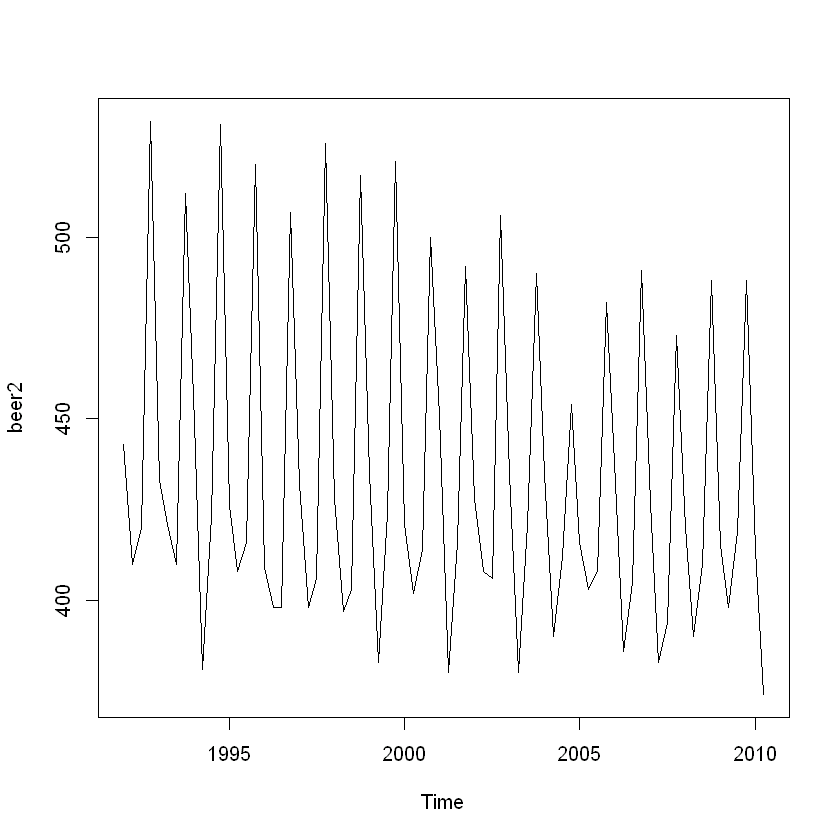

In [2]:
# base de dados da biblioteca "fpp2" (do livro de Hyndman)
# representa a produção de cerveja em Australia (em  megalitros)
# dados trimestrais
data(ausbeer)
beer2 <- window(ausbeer, start=c(1992,1), frequency=4)
plot(beer2)

In [3]:
str(beer2)

 Time-Series [1:74] from 1992 to 2010: 443 410 420 532 433 421 410 512 449 381 ...


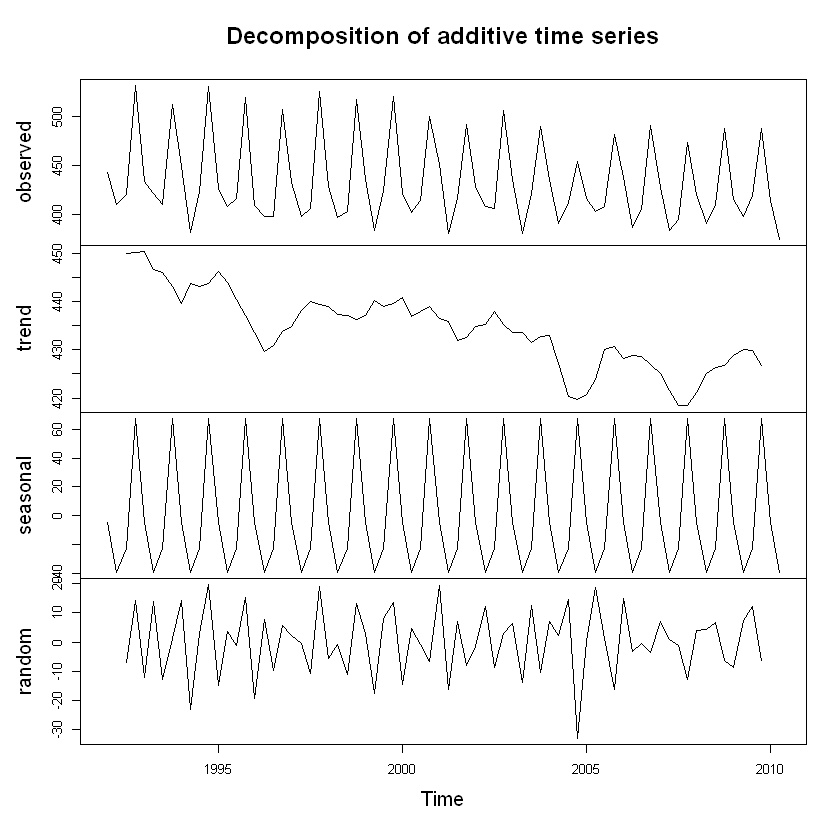

In [4]:
# decomposição aditiva para a série temporal
decompose_value <- decompose(beer2, "additive")
plot(decompose_value)

In [5]:
# observa-se uma componente sazonal e uma tendência decrescente

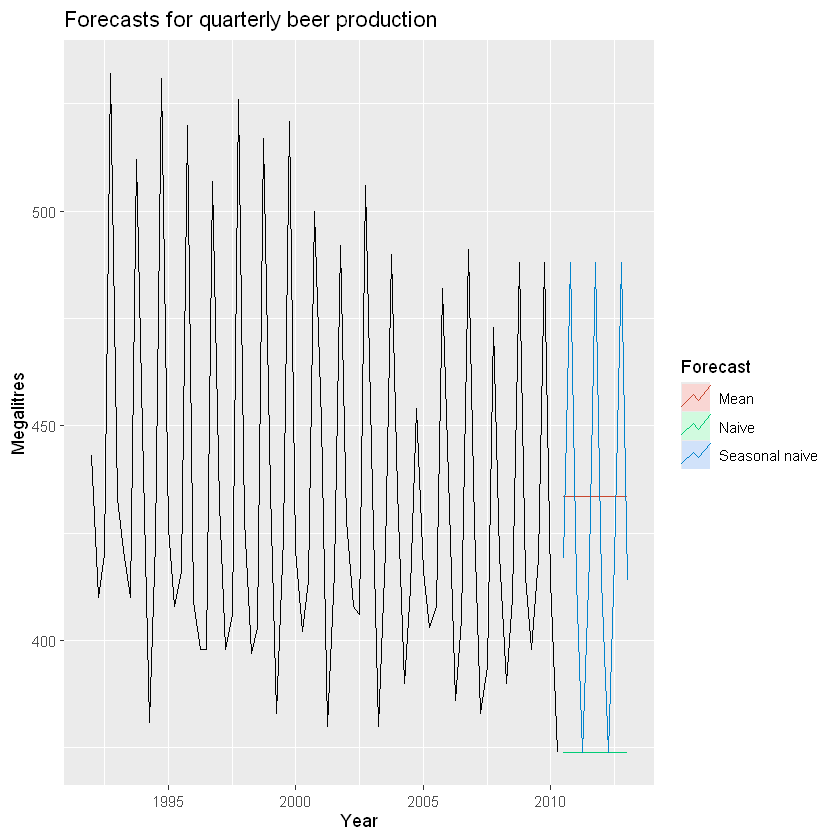

In [6]:
# previsões simples (naive, média)

autoplot(beer2) +
autolayer(meanf(beer2, h=11),
series="Mean", PI=FALSE) +
autolayer(naive(beer2, h=11),
series="Naive", PI=FALSE) +
autolayer(snaive(beer2, h=11),
series="Seasonal naive", PI=FALSE) +
ggtitle("Forecasts for quarterly beer production") +
xlab("Year") + ylab("Megalitres") +
guides(colour=guide_legend(title="Forecast"))

In [7]:
# auto-escolha do modelo com base no AIC, para a série temporal original
fit2 <- auto.arima(beer2, trace=TRUE)
fit2


 ARIMA(2,0,2)(1,1,1)[4] with drift         : Inf
 ARIMA(0,0,0)(0,1,0)[4] with drift         : 591.5033
 ARIMA(1,0,0)(1,1,0)[4] with drift         : 570.5504
 ARIMA(0,0,1)(0,1,1)[4] with drift         : 558.124
 ARIMA(0,0,0)(0,1,0)[4]                    : 590.0502
 ARIMA(0,0,1)(0,1,0)[4] with drift         : 589.4681
 ARIMA(0,0,1)(1,1,1)[4] with drift         : 559.717
 ARIMA(0,0,1)(0,1,2)[4] with drift         : 559.5714
 ARIMA(0,0,1)(1,1,0)[4] with drift         : 570.2782
 ARIMA(0,0,1)(1,1,2)[4] with drift         : Inf
 ARIMA(0,0,0)(0,1,1)[4] with drift         : 558.7729
 ARIMA(1,0,1)(0,1,1)[4] with drift         : Inf
 ARIMA(0,0,2)(0,1,1)[4] with drift         : 560.4428
 ARIMA(1,0,0)(0,1,1)[4] with drift         : 558.2872
 ARIMA(1,0,2)(0,1,1)[4] with drift         : Inf
 ARIMA(0,0,1)(0,1,1)[4]                    : 564.6653

 Best model: ARIMA(0,0,1)(0,1,1)[4] with drift         



Series: beer2 
ARIMA(0,0,1)(0,1,1)[4] with drift 

Coefficients:
          ma1     sma1    drift
      -0.2071  -0.7612  -0.3450
s.e.   0.1174   0.0878   0.0851

sigma^2 = 149.3:  log likelihood = -274.75
AIC=557.51   AICc=558.12   BIC=566.5

In [8]:
# análise do melhor modelo
fit4<-Arima(beer2, order=c(0,0,1),seasonal=c(0,1,1))
summary(fit4)

Series: beer2 
ARIMA(0,0,1)(0,1,1)[4] 

Coefficients:
          ma1     sma1
      -0.1059  -0.6145
s.e.   0.1152   0.0882

sigma^2 = 170.7:  log likelihood = -279.15
AIC=564.3   AICc=564.67   BIC=571.05

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE     MASE
Training set -3.721354 12.52281 9.533806 -0.9009091 2.226209 0.702491
                    ACF1
Training set -0.09632543

In [ ]:
# Testes de independência dos resíduos
# teste de Box-Pierce
Box.test(fit4$resid, lag=10, fitdf=0)

# teste de Box-Ljung
Box.test(fit4$resid,lag=10, fitdf=0, type="Lj")



	Box-Pierce test

data:  fit4$resid
X-squared = 10.555, df = 10, p-value = 0.3932



	Box-Ljung test

data:  fit4$resid
X-squared = 11.824, df = 10, p-value = 0.297


In [10]:
# não rejeitamos a H0, logo os resíduos são independentes

In [11]:
# teste para variância dos resíduos
ArchTest(fit4$resid)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  fit4$resid
Chi-squared = 4.7695, df = 12, p-value = 0.9652


In [12]:
# não rejeitamos a H0, logo os resíduos são homocedásticos (variância é constante)

In [13]:
# normalidade
jarque.bera.test(fit4$resid)


	Jarque Bera Test

data:  fit4$resid
X-squared = 7.6819, df = 2, p-value = 0.02147



	Ljung-Box test

data:  Residuals
Q* = 7.3198, df = 8, p-value = 0.5026

Model df: 0.   Total lags used: 8



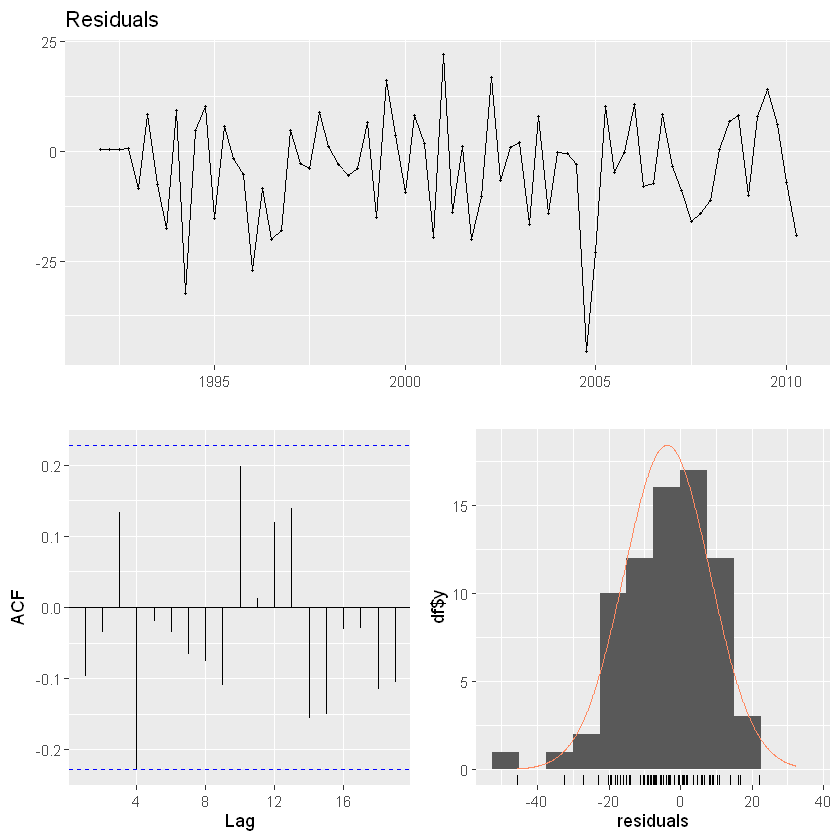

In [14]:
checkresiduals(fit4$resid)

ACF,-0.1,-0.03,0.13,-0.23,-0.02,-0.03,-0.07,-0.08,-0.11,0.20,0.01,0.12,0.14,-0.16,-0.15,-0.03,-0.03,-0.12,-0.10
PACF,-0.1,-0.04,0.13,-0.21,-0.05,-0.07,-0.03,-0.14,-0.15,0.17,0.03,0.13,0.06,-0.08,-0.22,-0.07,0.03,-0.10,-0.16


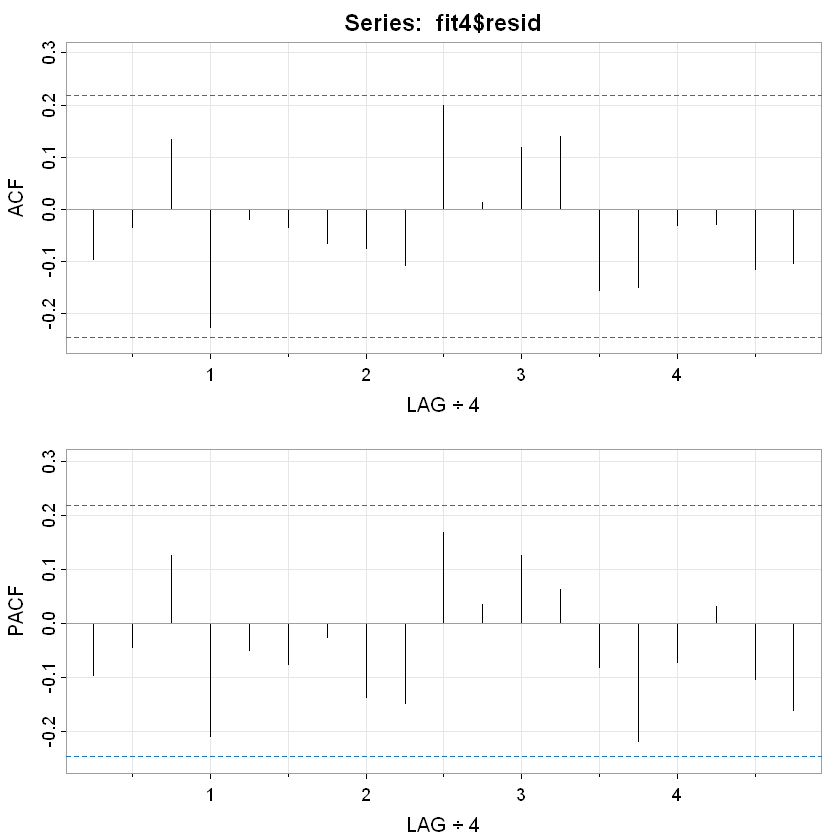

In [15]:
acf2(fit4$resid)

In [ ]:
# os resíduos são um processo de ruído branco, logo validamos o modelo ARIMA(0,0,1)(0,1,1)[4] com drift

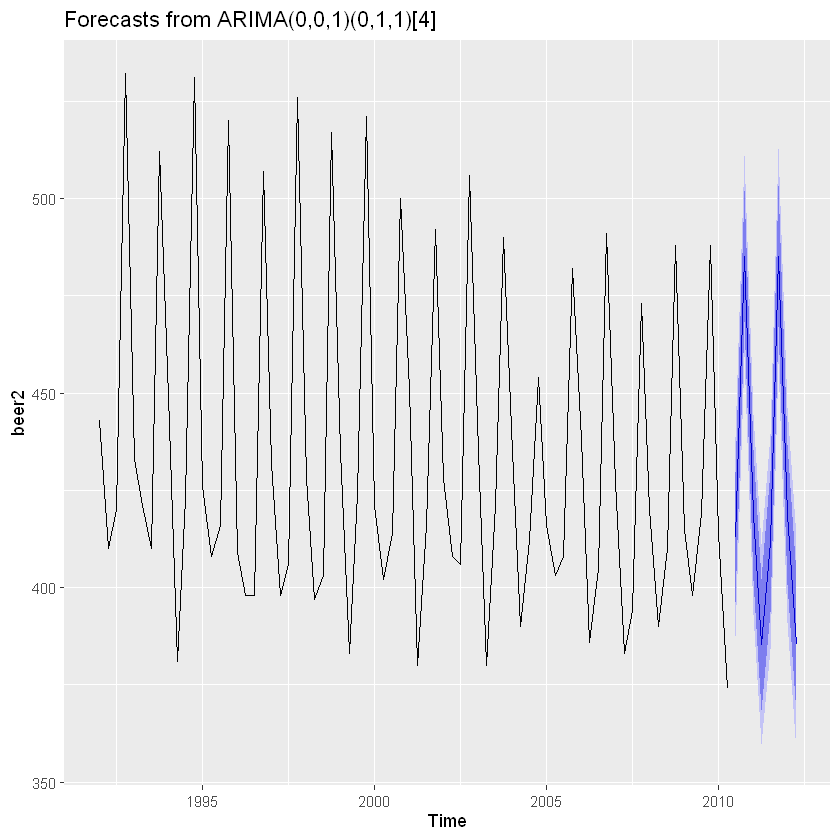

In [17]:
# previsão
autoplot(forecast(fit4))

In [18]:
aa<-forecast(fit4)
aa

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2010 Q3       412.9501 396.2084 429.6918 387.3459 438.5543
2010 Q4       485.2109 468.3757 502.0462 459.4637 510.9582
2011 Q1       418.7510 401.9158 435.5862 393.0038 444.4983
2011 Q2       385.3341 368.4989 402.1693 359.5868 411.0814
2011 Q3       411.7014 393.6715 429.7313 384.1271 439.2758
2011 Q4       485.2109 467.1681 503.2538 457.6168 512.8051
2012 Q1       418.7510 400.7082 436.7939 391.1569 446.3452
2012 Q2       385.3341 367.2913 403.3770 357.7400 412.9283

In [19]:
#############################################

## Atenção, existem várias funções da família ARMA/ARIMA, de várias bibliotecas

# Arima
# arima
# arma

In [20]:
#?arima

In [21]:
# performace (já está no output do modelo ARIMA escolhido)
ff5<-forecast(fit4)
mape(as.ts(beer2),ff5$fitted)

[1] 0.02226209

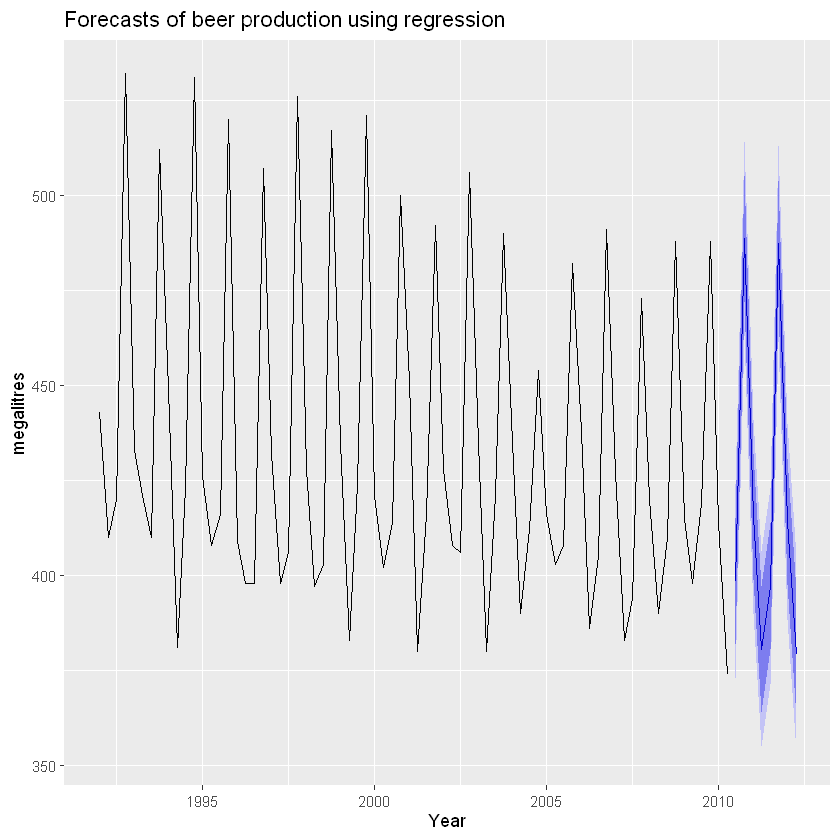

In [22]:
# usar a função tslm() para decompor  a série na soma das componentes (trend e season)
beer2 <- window(ausbeer, start=1992)
# regressão linear
fit.beer <- tslm(beer2 ~ trend + season)
# valores preditos pelo modelo de regressão linear
fcast <- forecast(fit.beer, h=8)
# representação gráfica
autoplot(fcast) +
ggtitle("Forecasts of beer production using regression") +
xlab("Year") + ylab("megalitres")

,Point Forecast,Lo 80,Hi 80,Lo 95,Hi 95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010 Q3,412.9501,396.2084,429.6918,387.3459,438.5543
2010 Q4,485.2109,468.3757,502.0462,459.4637,510.9582
2011 Q1,418.7510,401.9158,435.5862,393.0038,444.4983
2011 Q2,385.3341,368.4989,402.1693,359.5868,411.0814
2011 Q3,411.7014,393.6715,429.7313,384.1271,439.2758
2011 Q4,485.2109,467.1681,503.2538,457.6168,512.8051
2012 Q1,418.7510,400.7082,436.7939,391.1569,446.3452
2012 Q2,385.3341,367.2913,403.3770,357.7400,412.9283


,Point Forecast,Lo 80,Hi 80,Lo 95,Hi 95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010 Q3,398.4587,381.8746,415.0428,372.8900,424.0274
2010 Q4,488.7365,472.1524,505.3206,463.1678,514.3052
2011 Q1,415.5998,399.0029,432.1968,390.0113,441.1883
2011 Q2,380.5998,364.0029,397.1968,355.0113,406.1883
2011 Q3,397.0976,380.4421,413.7532,371.4188,422.7765
2011 Q4,487.3754,470.7199,504.0310,461.6966,513.0543
2012 Q1,414.2387,397.5669,430.9106,388.5347,439.9428
2012 Q2,379.2387,362.5669,395.9106,353.5347,404.9428


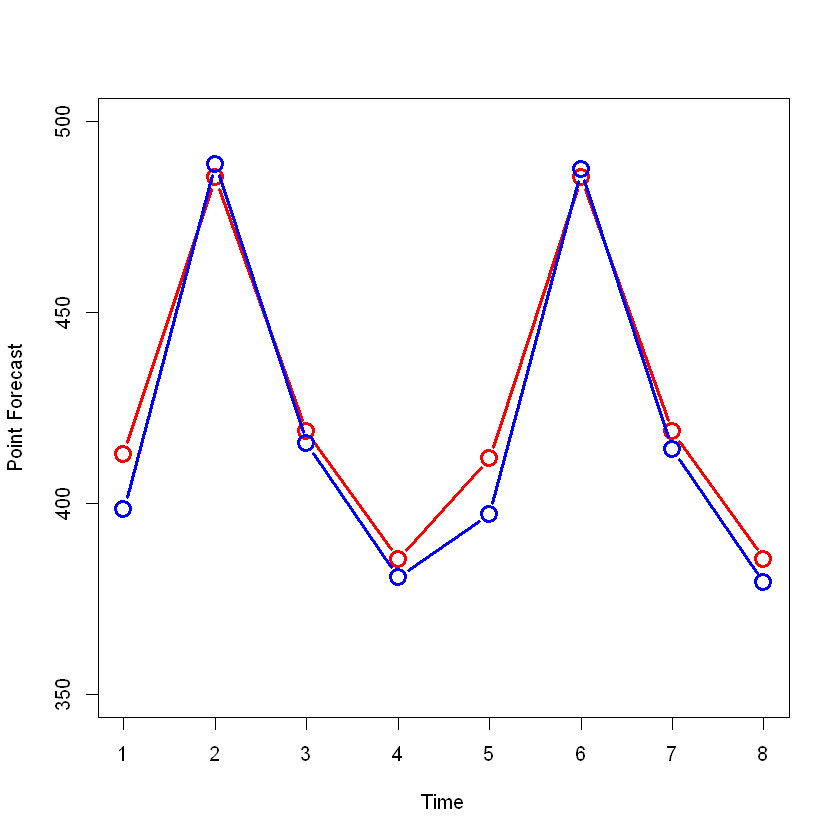

In [23]:
# previsão out-of-sample (8 observações) com base nos 2 modelos considerados
f1<-forecast(fit4)
f2<-forecast(fit.beer, h=8)
# data-frame das previsões e seus intervalos de confiança e previsão
f1<-as.data.frame(f1)
f1
f2<-as.data.frame(f2)
f2
# representação gráfica dos valores préditos
f11<-ts(f1['Point Forecast'])
f22<-ts(f2['Point Forecast'])
plot.ts(f11, col='red',lwd=2.5,type="b", cex=1.8, ylim=c(350,500))
lines(f22, col='blue',lwd=2.5, type="b", cex=1.8)

## Exemplo 2 -  Previsão de séries temporais financeiras

In [ ]:
# importar dados do yahoo finance em ficheiros cvs
# séries financeiras em frequência mensal
### apenas vamos analisar os preços de fecho (Close) da aaple (aapl)
### as outras 2 séries temporais ficam para TPC

aapl<- read.csv("AAPL.csv")
microsoft<- read.csv("MSFT.csv")
amazon<- read.csv("AMZN.csv")


In [25]:
### as últimas observações
tail(aapl)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
451,2022-07-01,136.04,163.63,135.66,162.51,162.0158,1447125400
452,2022-08-01,161.01,176.15,157.14,157.22,156.7419,1510239600
453,2022-09-01,156.64,164.26,138.00,138.20,137.9711,2084722800
454,2022-10-01,138.21,157.50,134.37,153.34,153.0860,1868139700
455,2022-11-01,155.08,155.45,134.38,148.03,147.7849,1724691200
456,2022-12-01,148.21,150.92,140.00,142.16,142.1600,478144300


In [26]:
### informação sobre o data frame - 456 observações
str(aapl)

'data.frame':	456 obs. of  7 variables:
 $ Date     : chr  "1985-01-01" "1985-02-01" "1985-03-01" "1985-04-01" ...
 $ Open     : num  0.13 0.1295 0.1105 0.0988 0.0949 ...
 $ High     : num  0.139 0.1373 0.1161 0.1027 0.0993 ...
 $ Low      : num  0.1244 0.1105 0.0926 0.0876 0.0753 ...
 $ Close    : num  0.1295 0.1105 0.0988 0.0949 0.0776 ...
 $ Adj.Close: num  0.1007 0.086 0.0769 0.0738 0.0604 ...
 $ Volume   : num  6.37e+09 4.73e+09 4.62e+09 2.87e+09 4.64e+09 ...


In [27]:
str(amazon)

'data.frame':	307 obs. of  7 variables:
 $ Date     : chr  "1997-06-01" "1997-07-01" "1997-08-01" "1997-09-01" ...
 $ Open     : num  0.0755 0.0771 0.1172 0.1172 0.2219 ...
 $ High     : num  0.0854 0.1286 0.1208 0.2406 0.275 ...
 $ Low      : num  0.0688 0.0755 0.0969 0.1156 0.176 ...
 $ Close    : num  0.0771 0.1198 0.1169 0.2169 0.2542 ...
 $ Adj.Close: num  0.0771 0.1198 0.1169 0.2169 0.2542 ...
 $ Volume   : num  1.06e+09 2.17e+09 6.38e+08 2.16e+09 2.10e+09 ...


In [28]:
str(microsoft)

'data.frame':	441 obs. of  7 variables:
 $ Date     : chr  "1986-04-01" "1986-05-01" "1986-06-01" "1986-07-01" ...
 $ Open     : num  0.0955 0.112 0.1215 0.1068 0.099 ...
 $ High     : num  0.122 0.123 0.122 0.109 0.107 ...
 $ Low      : num  0.0929 0.1076 0.1024 0.0903 0.0946 ...
 $ Close    : num  0.112 0.122 0.107 0.099 0.099 ...
 $ Adj.Close: num  0.07 0.076 0.0668 0.0619 0.0619 ...
 $ Volume   : num  5.47e+08 3.33e+08 2.94e+08 4.61e+08 2.66e+08 ...


In [29]:
### usar a função "ts" para transformar tabela de dados em séries temporais
### apenas usamos a coluna dos preços de fecho
ts1<-ts(aapl$Close,start=c(1985,1), frequency = 12)
ts2<-ts(amazon$Close,start=c(1997,6), frequency = 12)
ts3<-ts(microsoft$Close,start=c(1986,4), frequency = 12)

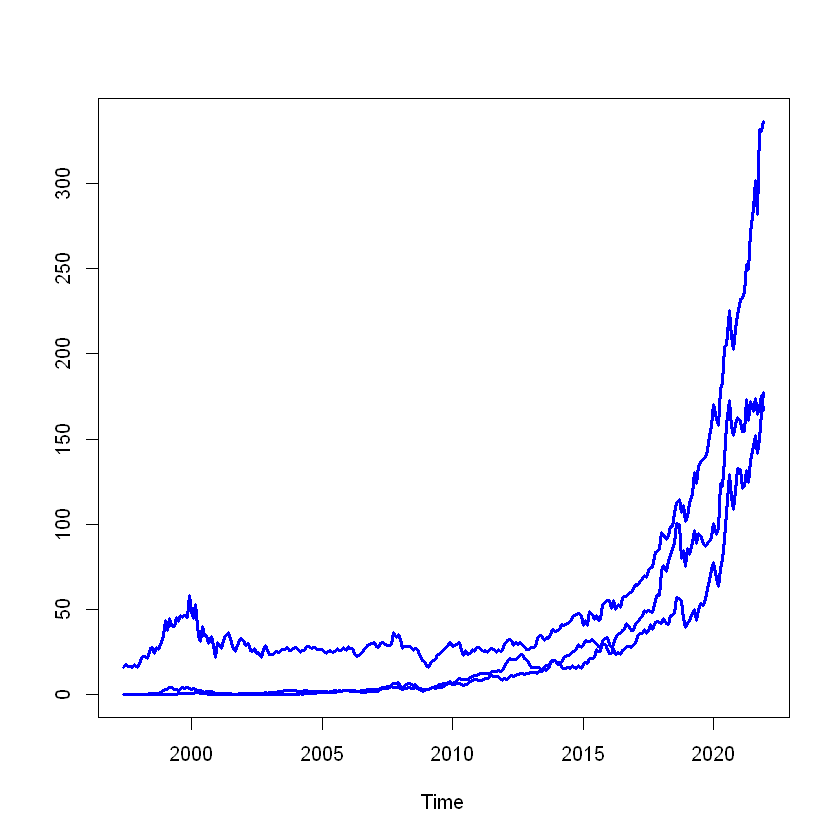

In [ ]:
### para efeitos de visualização, definimos janelas com o mesmo número de observações para cada time series
ts1n<-window(ts1, start=c(1997,6), end=c(2021,12), frequency = 12)
ts2n<-window(ts2, start=c(1997,6),end=c(2021,12),frequency = 12)
ts3n<-window(ts3, start=c(1997,6),end=c(2021,12),frequency = 12)
total<-cbind(ts1n,ts2n,ts3n)
ts.plot(total,col='blue',lwd=2.5)


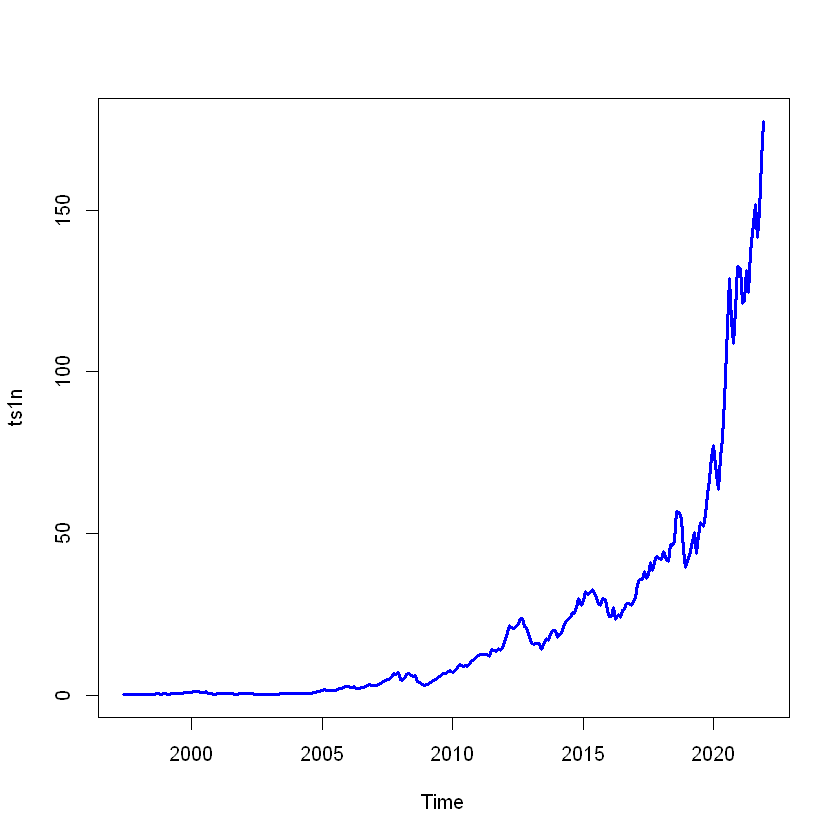

In [31]:
# vamos analisar a série AAPL
# geralmente trabalhamos com os preços de fecho ou com os preços de fecho ajustados

# obter a série temporal dos preços de fecho (AAPL.Close)
ts.plot(ts1n, col='blue',lwd=2.5)

In [32]:
# não existe sazonalidade
# existe tendência exponencial, devemos logaritmizar a série temporal

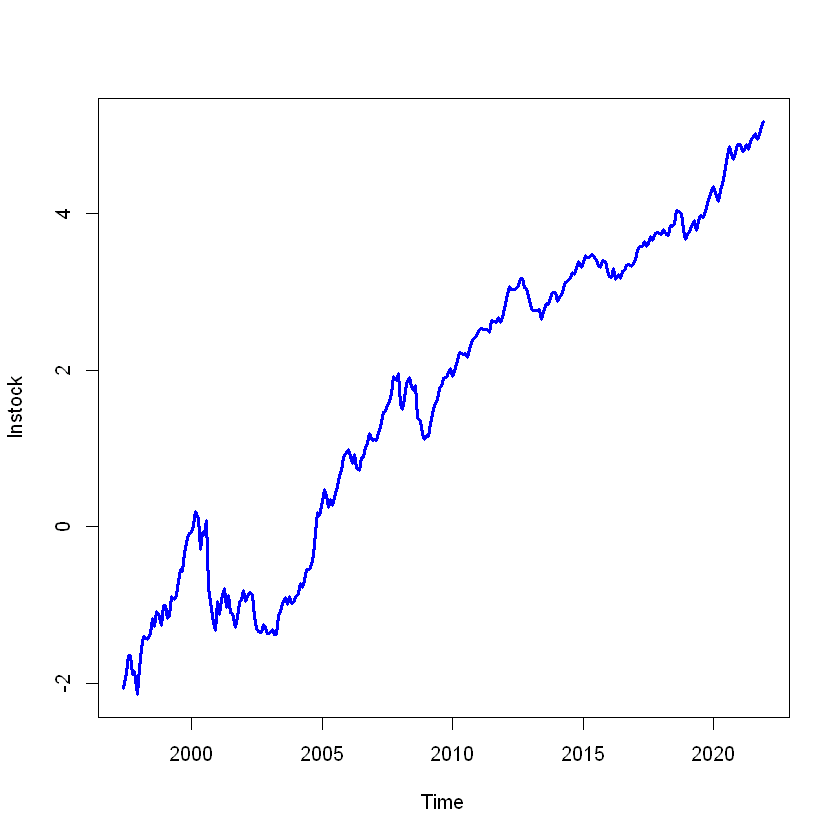

In [33]:
# série temporal logaritmizada
lnstock=log(ts1n)
plot(lnstock, col='blue',lwd=2.5)


In [34]:
# agora a tendência determínistica global parece ser linear

ACF,0.99,0.97,0.96,0.95,0.94,0.93,0.91,0.90,0.89,0.88,⋯,0.63,0.62,0.61,0.60,0.59,0.58,0.57,0.56,0.55,0.54
PACF,0.99,0.01,0.02,0.00,-0.04,-0.02,-0.03,0.03,0.01,0.03,⋯,0.00,-0.10,-0.04,-0.01,-0.02,0.04,0.00,0.02,0.00,-0.02


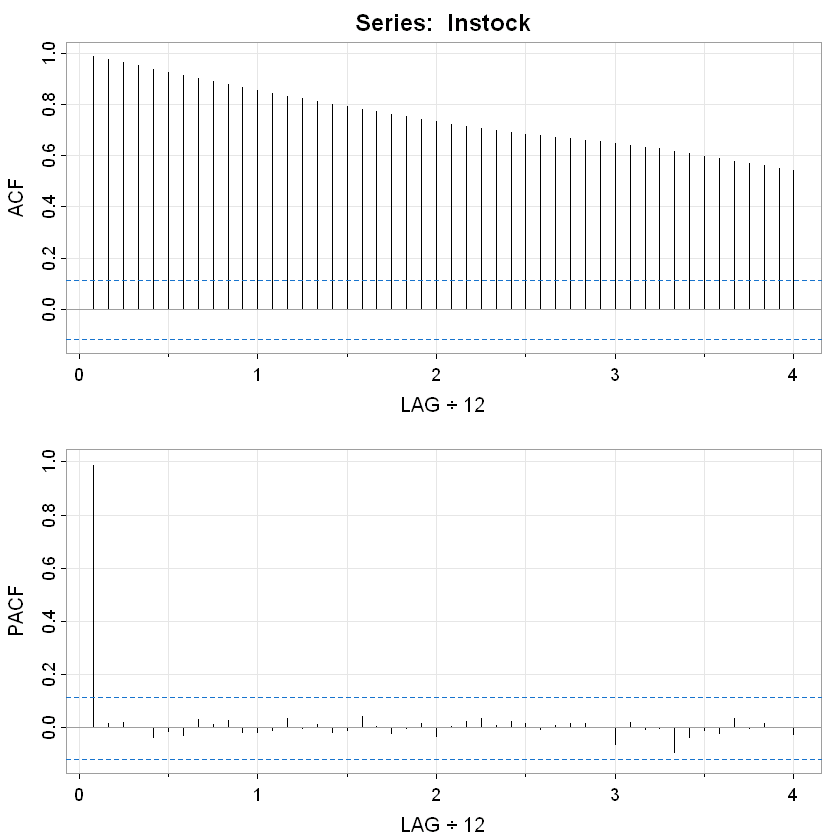

In [ ]:
# correlograma (ACF e PACF)
acf2(lnstock)


In [36]:
# test de estacionaridade de KPSS (biblioteca urca)
uast1<-ur.kpss(lnstock)
summary(uast1)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 4.8632 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [37]:
# como estatística teste (4.86) > valor crítico 5pct (0.463), rejeitamos a H0 de estacionaridade
# logo, a série temporal logaritmizada é não-estacionária

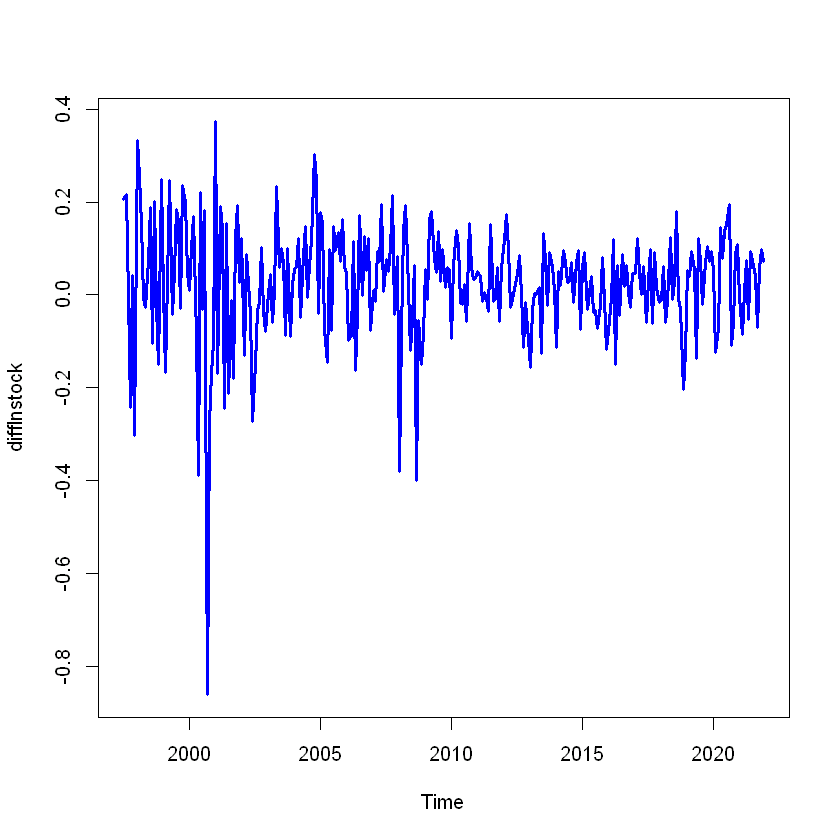

In [38]:
# estacionarizar a série usando o operador primeira diferença (obtemos os retornos logaritmizados)
difflnstock=diff(lnstock,1)
difflnstock <- na.omit(difflnstock)
plot(difflnstock, col='blue',lwd=2.5)



In [39]:
# usar o teste PP para os retornos (com 2 bibliotecas diferentes: tseries e urca

pp.test(difflnstock)

uadf3<-ur.pp(difflnstock, type=c("Z-tau"))
summary(uadf3)

Warning message in pp.test(difflnstock):
"p-value smaller than printed p-value"



	Phillips-Perron Unit Root Test

data:  difflnstock
Dickey-Fuller Z(alpha) = -281.46, Truncation lag parameter = 5, p-value
= 0.01
alternative hypothesis: stationary



################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89308 -0.05918  0.01483  0.07140  0.35639 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 0.022822   0.007478   3.052  0.00248 **
y.l1        0.048657   0.058358   0.834  0.40509   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1257 on 291 degrees of freedom
Multiple R-squared:  0.002383,	Adjusted R-squared:  -0.001045 
F-statistic: 0.6952 on 1 and 291 DF,  p-value: 0.4051


Value of test-statistic, type: Z-tau  is: -16.31 

         aux. Z statistics
Z-tau-mu            3.0535

Critical values for Z statistics: 
                     1pct      5pct    10pct
critical values -3.454315 -2.871542 -2.57206


In [40]:
# a série dos retornos logaritmizados é estacionária (rejeitamos a H0 do teste PP)
# portanto a série dos preços de fecho de AAPL é integrada de ordem 1, I(1)


ACF,0.05,0.04,-0.02,-0.06,0.08,-0.09,0.05,0.02,-0.06,0.08,⋯,-0.09,-0.03,-0.02,-0.05,0.05,-0.04,0.03,0.02,-0.08,-0.09
PACF,0.05,0.04,-0.02,-0.06,0.09,-0.10,0.05,0.02,-0.06,0.07,⋯,-0.02,-0.06,-0.04,-0.01,0.03,-0.02,-0.02,0.01,-0.08,-0.09


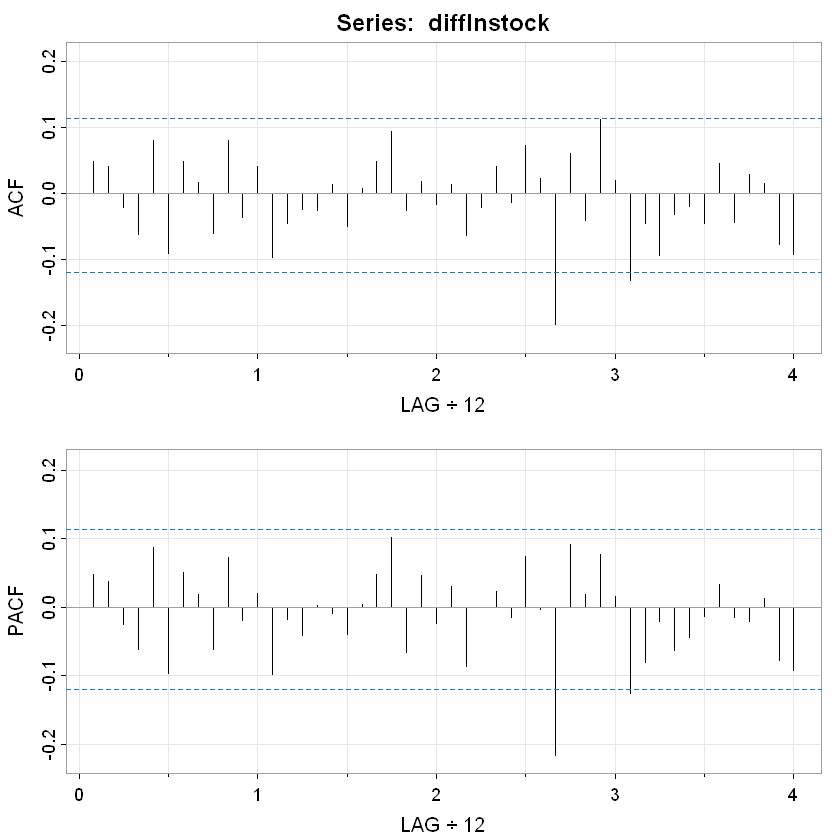

In [41]:
# correlograma dos retornos
acf2(difflnstock)

In [42]:
# os retornos parecem ruído branco (não existem picos significativos no correlograma)
# Atenção! o ruído branco não pode ser predito

In [43]:
# auto.arima para escolher o modelo que melhor se ajusta aos retornos

fit1 <- auto.arima(difflnstock)
summary(fit1)


Series: difflnstock 
ARIMA(1,0,0)(2,0,0)[12] with non-zero mean 

Coefficients:
         ar1    sar1     sar2    mean
      0.0571  0.0531  -0.0235  0.0247
s.e.  0.0529  0.0571   0.0547  0.0080

sigma^2 = 0.01591:  log likelihood = 193.56
AIC=-377.11   AICc=-376.91   BIC=-358.7

Training set error measures:
                        ME      RMSE        MAE      MPE     MAPE     MASE
Training set -5.442842e-05 0.1252579 0.09009184 156.2236 245.9836 0.714724
                     ACF1
Training set -0.002153536

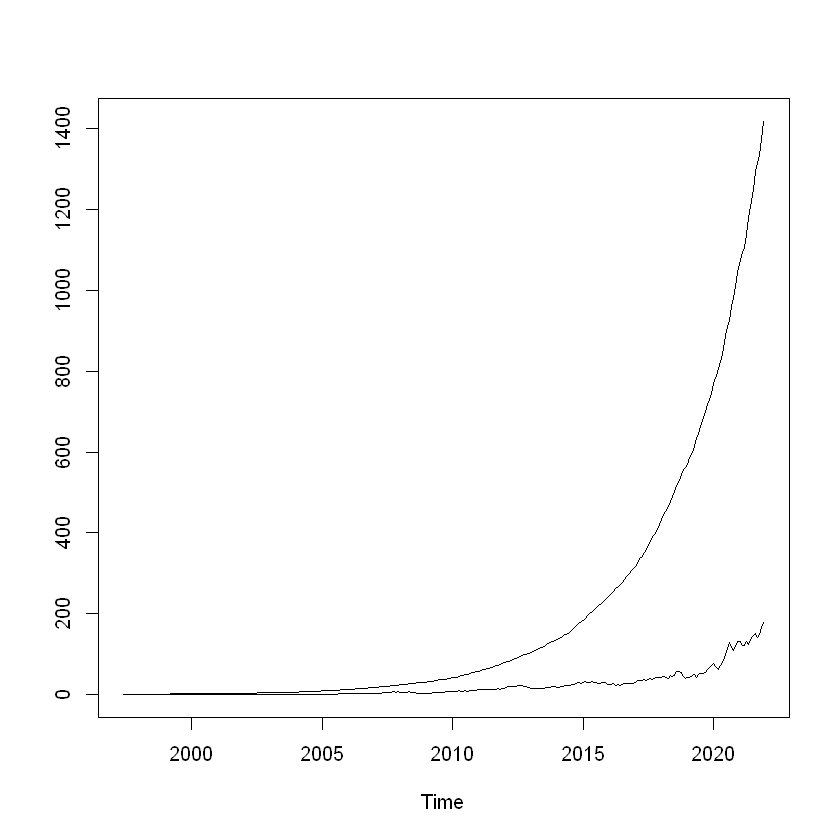

In [44]:
# modelo final: ARIMA(1,0,0)
fit22 <- arima(difflnstock, c(1,0,0), seasonal=c(2,0,0))

# valores ajustados/preditos pelo modelo MA(1)
forct<-fitted(fit22);

# transformação inversa aplicada aos valores ajustados - para obter a previsão na escala original
# exp por causa do logaritmo e diffinv por causa do operador primeira diferença
xf <- ts(exp(diffinv(forct)),start=c(1997,06),frequency=12);

# representação gráfica dos valores observados e dos valores ajustados pelo modelo final
series<-cbind(xf,ts1n)
ts.plot(series)



In [45]:
# observa-se que o modelo ARIMA(1,0,0)(2,0,0) não tem um bom desempenho em termos preditivos

In [46]:
# performance
mape(ts1n,xf)
rmse(ts1n,xf)


[1] 7.070249

[1] 328.7669


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0)(2,0,0)[12] with non-zero mean
Q* = 20.367, df = 21, p-value = 0.4981

Model df: 3.   Total lags used: 24



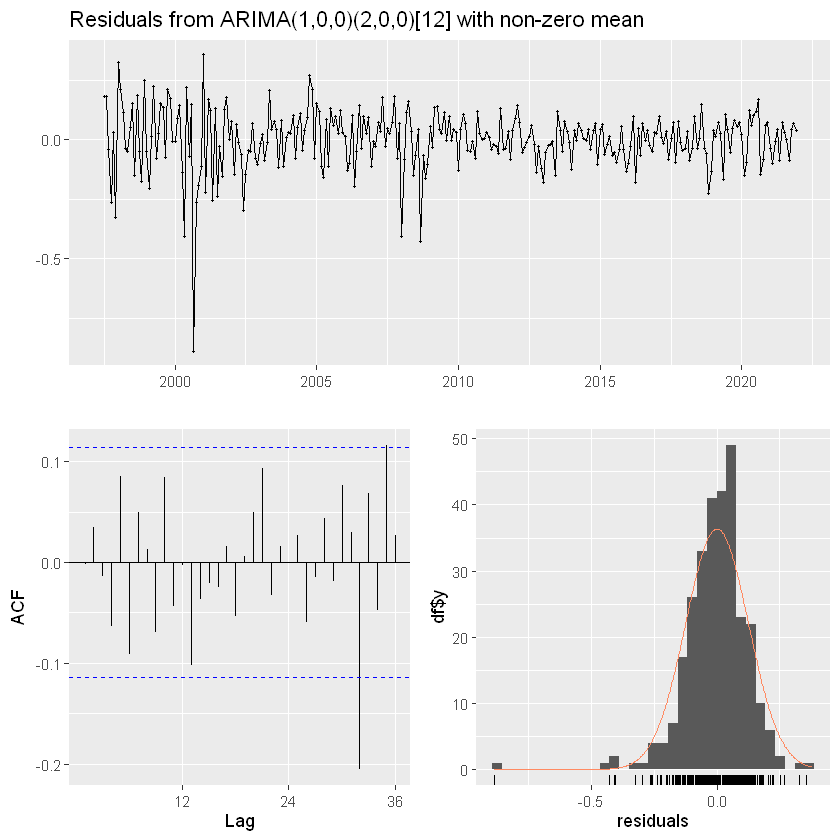

In [47]:
# vamos verificar os pressupostos dos resíduos
checkresiduals(fit22)

In [48]:
# os pressupostos dos resíduos são verificados
# o modelo pode ser validado, mas não tem qualidade preditivas
# uma das razões é o fato que os retornos são um processo de ruído branco
# este é um fenomeno bastante frequente nos dados finaceiros ( o que levou a hipótese dos mercados eficientes)
# recomenda-se uma análise sobre os dados em níveis, pois os retornos não podem ser preditos.

In [49]:
# vamos escolher o melhor modelo, usando apenas a série logaritmizada (não os retornos)

fit3 <- auto.arima(lnstock)
summary(fit3)


Series: lnstock 
ARIMA(1,1,0)(2,0,0)[12] with drift 

Coefficients:
         ar1    sar1     sar2   drift
      0.0575  0.0535  -0.0238  0.0247
s.e.  0.0605  0.0552   0.0603  0.0080

sigma^2 = 0.01591:  log likelihood = 193.56
AIC=-377.11   AICc=-376.91   BIC=-358.7

Training set error measures:
                        ME      RMSE        MAE        MPE     MAPE      MASE
Training set -6.801957e-05 0.1250454 0.08979306 -0.3604625 13.49503 0.1971797
                    ACF1
Training set -0.00255238


Call:
arima(x = lnstock, order = c(1, 1, 0), seasonal = c(2, 0, 0))

Coefficients:
         ar1    sar1     sar2
      0.0897  0.0848  -0.0016
s.e.  0.0586  0.0603   0.0631

sigma^2 estimated as 0.01616:  log likelihood = 189.23,  aic = -370.45

Training set error measures:
                     ME      RMSE        MAE        MPE     MAPE      MASE
Training set 0.02055312 0.1268912 0.09235434 -0.1140626 14.31394 0.9839923
                    ACF1
Training set -0.03297773

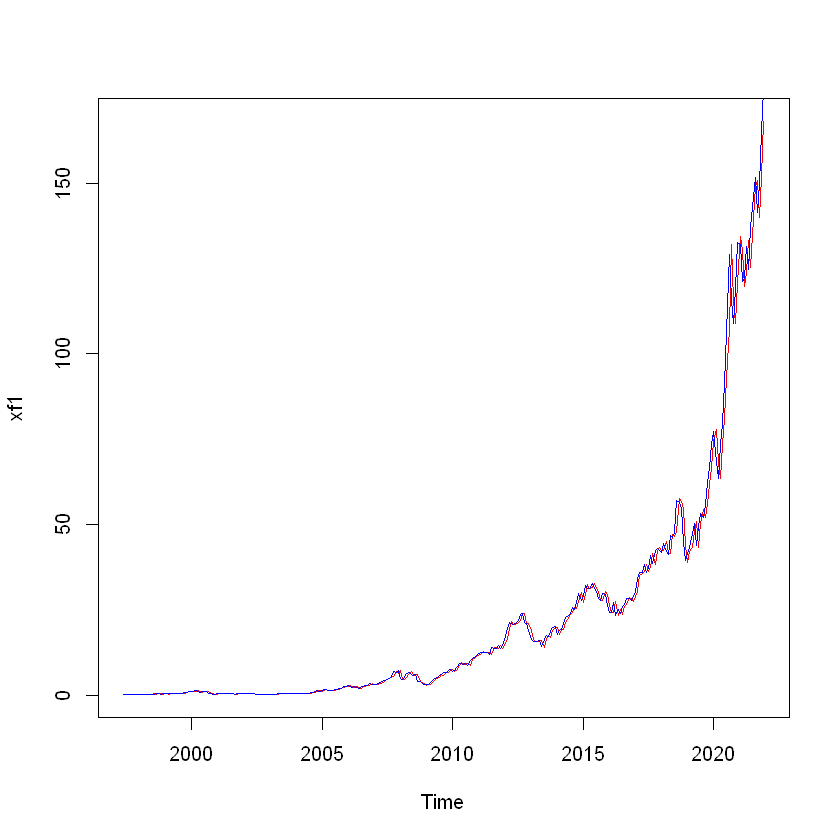


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(2,0,0)[12]
Q* = 21.77, df = 21, p-value = 0.4128

Model df: 3.   Total lags used: 24



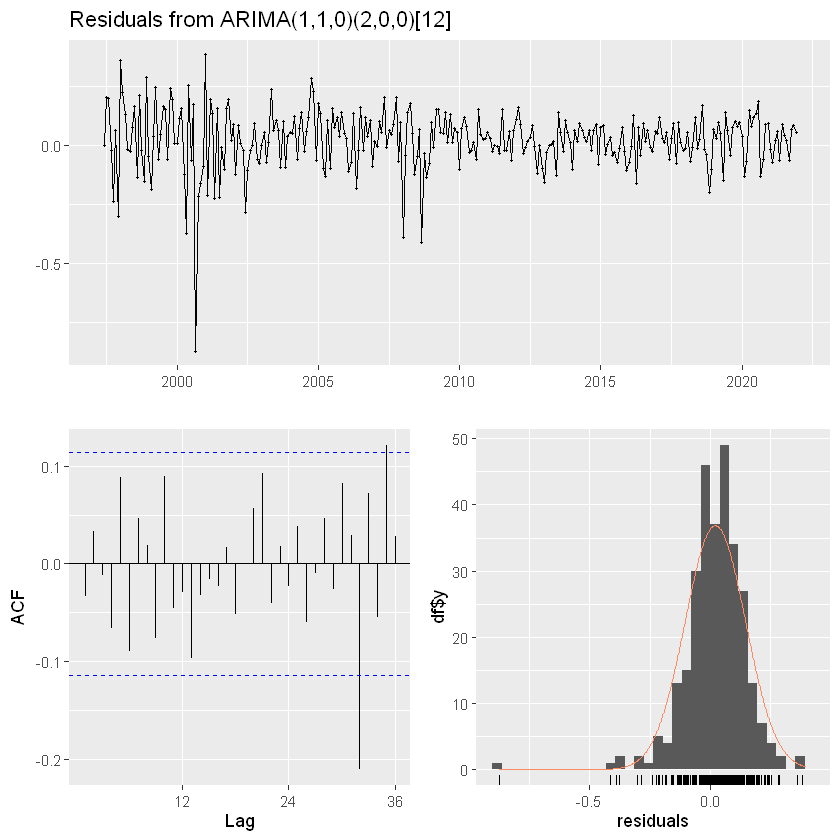

In [50]:
# o melhor modelo é ARIMA(0,1,1)
fit41 <- arima(lnstock, c(1,1,0),c(2,0,0))
summary(fit41)
# determinar os valores ajustados/preditos pelo modelo final
forct41<-fitted(fit41)
# exponenciar os valores da série predita
xf1 <- ts(exp(forct41), start=c(1997,06),frequency=12)

# representar graficamente os valores ajustados pelo modelo ARIMA(0,1,1) e a série temporal original
plot(xf1, col='red')
lines(ts1n, col='blue')
# verificar os resíduos
checkresiduals(fit41)

In [51]:
# os resíduos são ruído branco
# a previsão parece naive (f(t) = y(t-1)), os valores preditos são os valores reais deslocados com uma unidade de tempo

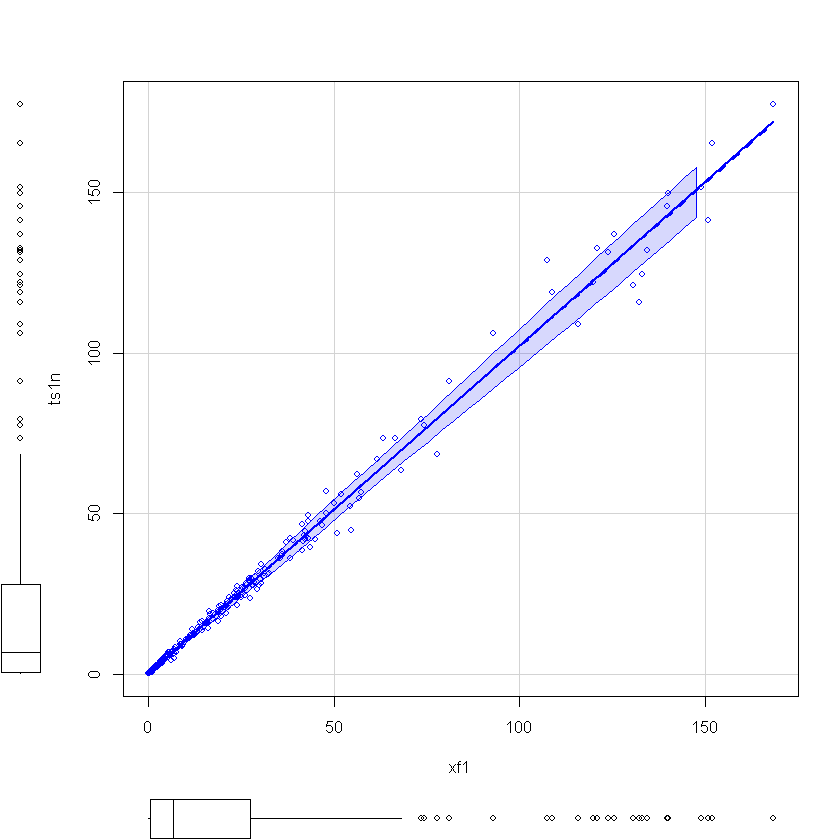

In [52]:
# vamos ver se a previsão é naive
scatterplot(xf1,ts1n)

In [53]:
cor(xf1,ts1n)

[1] 0.9956901

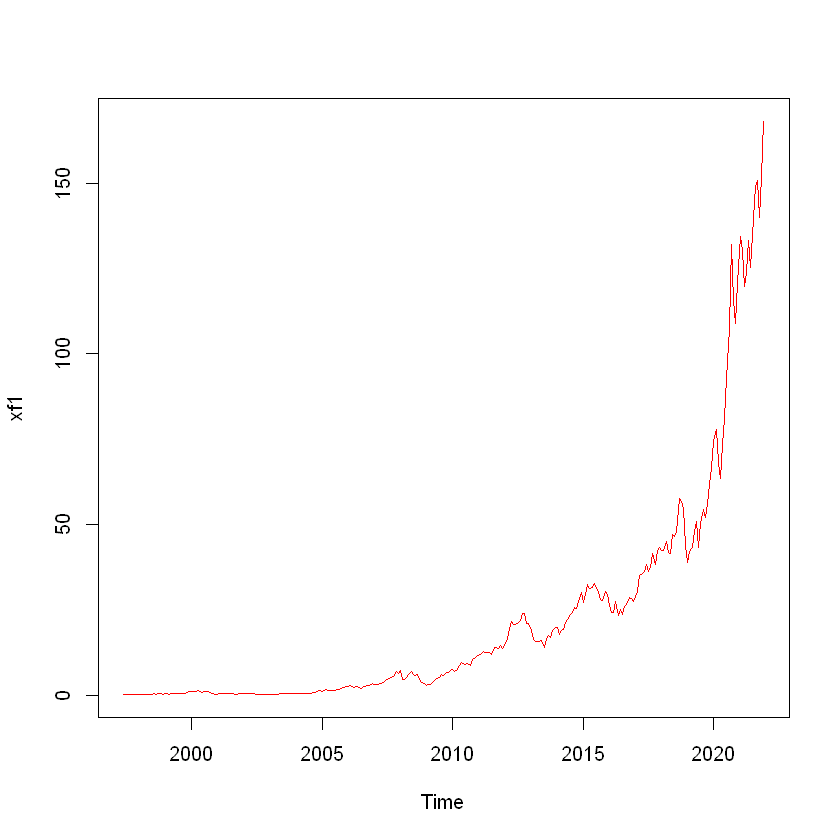

In [54]:
# calcular a séries desfasada com um lag da variável original (que na prática é a previsão naive)
# representar graficamente os valores preditos (ajustados) e os valores desfasados com uma unidade da série original
x1<-lag(as.vector(ts1n))
plot(xf1, col='red')
lines(x1, col='blue')

In [55]:
# performance
mape(ts1n,xf1)
rmse(ts1n,xf1)

[1] 0.09319115

[1] 3.291296

In [56]:
# os gráficos são completamente sobrepostos, a correlação entre as séries é praticamente perfeita
# logo, temos uma previsão naive
# Portanto, nota-se que apesar de os modelos serem validados, a capacidade de previsão é muito baixa para a série temporal financeira considerada.

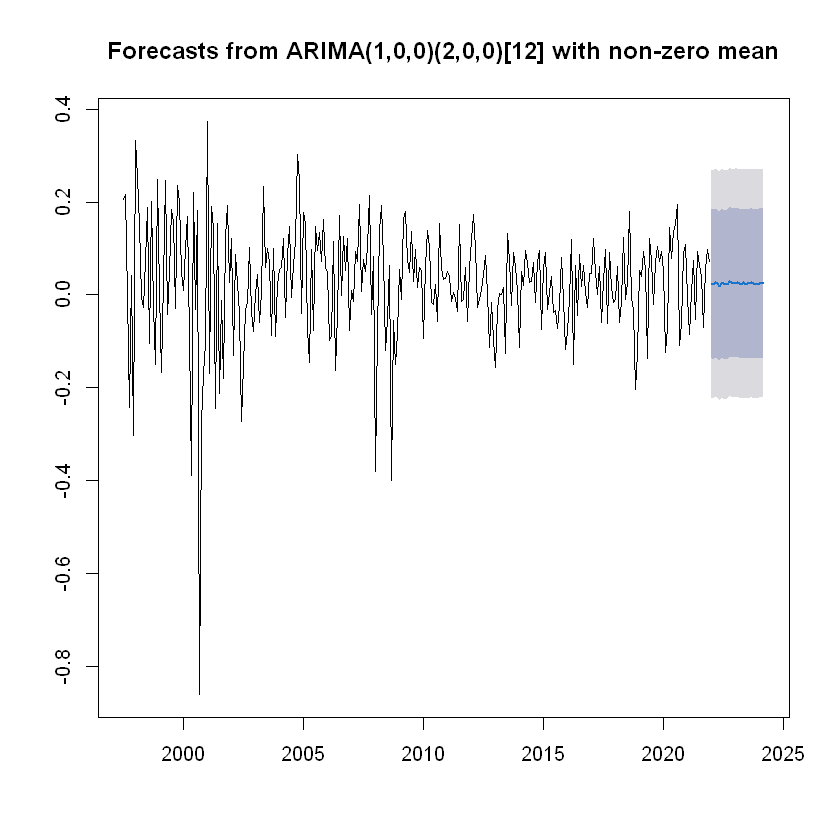

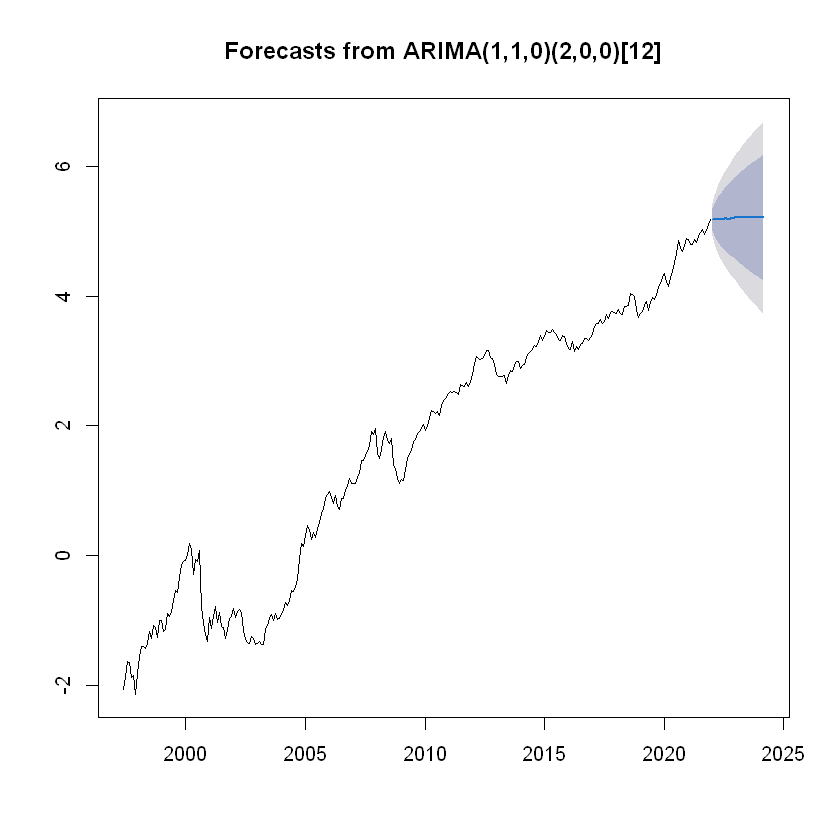

In [57]:
# fazer previsão fora de amostra (out-of-sample forecast)
# para a série original (em níveis)
# para a série dos retornos

forecasted2_ln <- forecast(fit22,27)
forecasted4 <- forecast(fit41,27)
plot(forecasted2_ln)
plot(forecasted4)


## Easy way

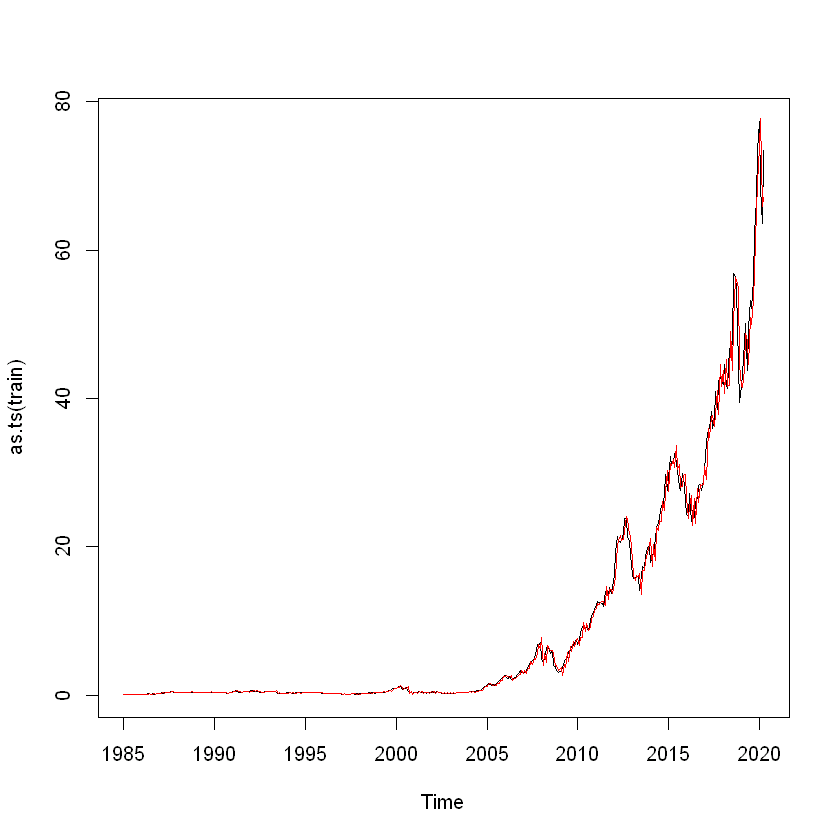

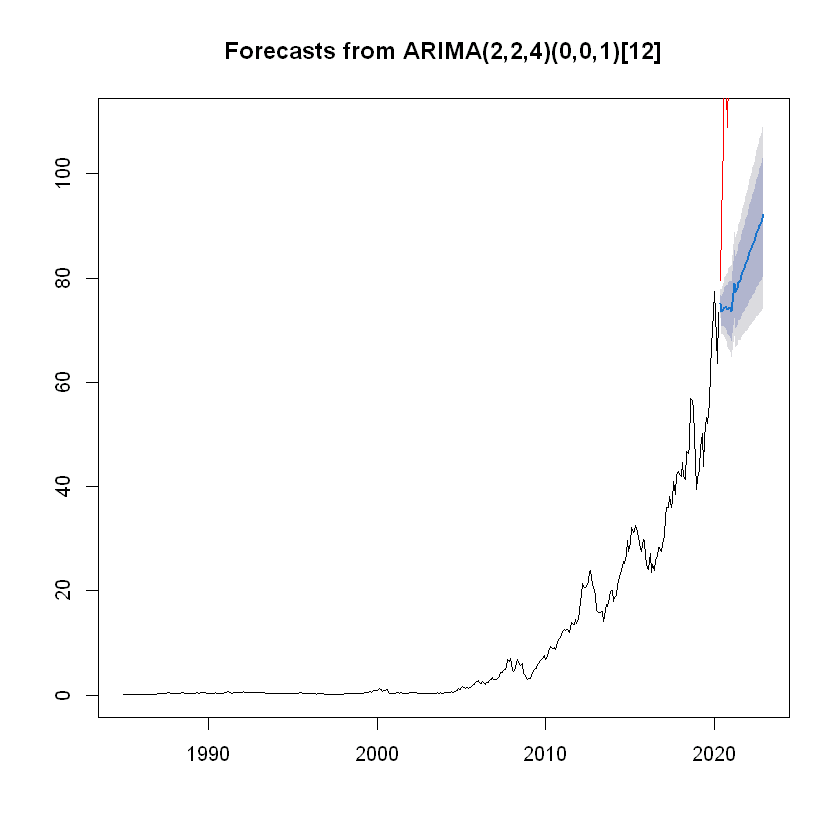

In [58]:
# easy way - forma concentrada
# previsão dos stocks de AAPL usando os modelos ARIMA

aapl<-ts1
train = window(aapl, start=c(1985,1), end=c(2020,4))
test = window(aapl, start=c(2020,5))
fit <- auto.arima(train, ic="bic")
plot(as.ts(train))
lines(fitted(fit), col="red")
fit.forecast<-forecast(fit, h=32)
plot(fit.forecast)
lines(test, col="red")



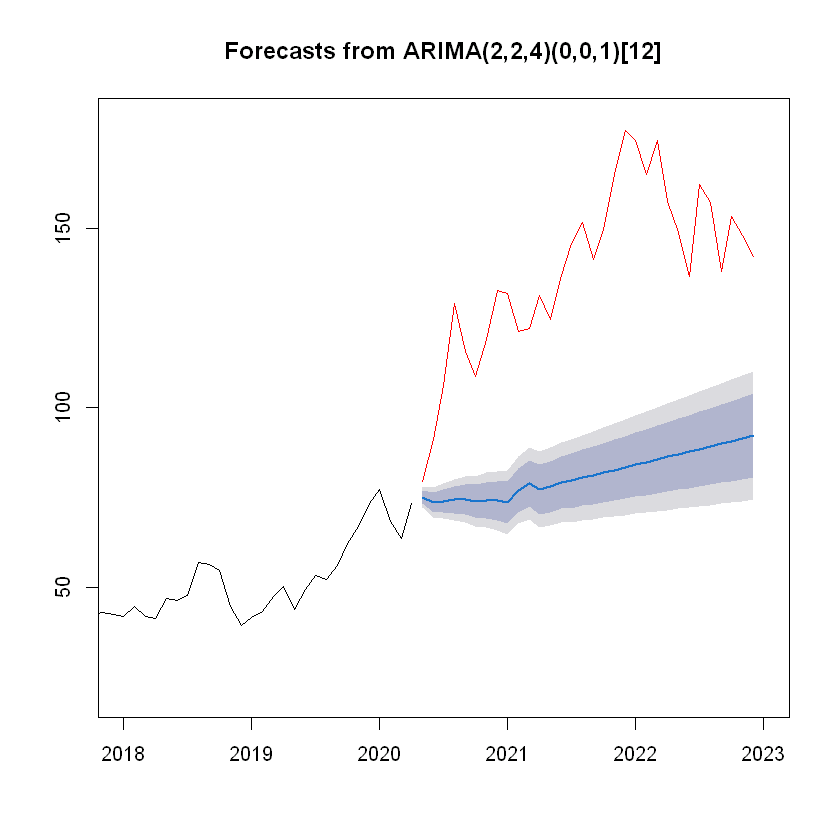

In [59]:
plot(fit.forecast, xlim = c(2018, 2023), ylim = c(20, 180))
lines(test, col="red")
